## Final Project Submission

Please fill out:
* Student name: Alvin Kimathi Mutua
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali 
* Blog post URL:


# Overview

## Business Understanding

Microsoft would like to venture into the movie arena, an industry that they have little to zero experience in. This came up as a result the major companies in the game creating original and quality content soaring their client coverage and business-wise revenue being generated

## Objectives

The main objecive of this is to analyze the data from the datasets provided from trends to movie budgets to ratings and genres to be able to translate it into an insight for Microsoft's Studio.
We want to be able to identify and clearly read this data to be able to help microsoft make informed decisions about what to venture and invest into to maximize their chances of success in this particular industry.
By this we can help Microsoft to increase its chances of being a powerhouse in the film industry.
 

### Data Exploring and Preparation

Import the libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

Connect to the imdb database and load the data into dataframes with the tables movie_basics and movie_ratings being the most relevant being those that are of interest

In [2]:
conn = sqlite3.connect(r"C:\Users\amutu\OneDrive\Desktop\Moringa\Project\dsc-phase-1-project-v2-4\zippedData\im.db\im.db")
movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

Load the CSV files provided into panda dataframes with the path of where our data is located

In [3]:
movie_budgets_df = pd.read_csv(r"C:\Users\amutu\OneDrive\Desktop\Moringa\Project\dsc-phase-1-project-v2-4\zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv")
movie_gross_df = pd.read_csv(r"C:\Users\amutu\OneDrive\Desktop\Moringa\Project\dsc-phase-1-project-v2-4\zippedData\bom.movie_gross.csv\bom.movie_gross.csv")

To understand the loaded data and the structure in it's raw form we want to look at the contents provided and ensure our data has been extracted properly.


In [4]:
#Display first few rows of each dataframes
print("Movie Budgets Data:")
print(movie_budgets_df.head())

print("\nMovie Gross Data:")
print(movie_gross_df.head())

print("\nMovie Basics Data:")
print(movie_basics_df.head())

print("\nMovie Ratings Data:")
print(movie_ratings_df.head())




Movie Budgets Data:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  

Movie Gross Data:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter

Having extracted the data that we need to use, we merge the tables movie_ratings and movie_basics to have them as one being the most relevant in the case study by creating a new variable database_1

In [5]:
database_1 = movie_basics_df.merge(movie_ratings_df, on= "movie_id", how="left")
database_1

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


Since there are data that concur in the different datasets that we have been provided with, we need to match them before merging the relevant tables


In [6]:
#We filter out and separate the year for the movies in our movie_budget cscv file
#before merging our database
movie_budgets_df['year'] = pd.DatetimeIndex(movie_budgets_df["release_date"]).year
#this ensures the year has been filtered from release_date and a new column for year created
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


We then rename our primary_title in our database_1 to movie to match that in our csv file(movie_budgets_df) before we merge them

In [7]:
database_1 = database_1.rename(columns={"primary_title": "movie"})
database_1

,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


We also rename the column start_year in our database_1 to match that in our csv file(movie_budgets_df)

In [8]:
database_1 = database_1.rename(columns={"start_year": "year"})
database_1                 

,movie_id,movie,original_title,year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


Having renamed both the primary_title column to movie and start_year column to year we go ahead to merge both databases and display the outcome to ensure our code has worked correctly

In [9]:
database_2 = movie_budgets_df.merge(database_1, on=["movie", 'year'])
database_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1543,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt4931374,Exeter,92.0,None,NaN,NaN
1544,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1545,59,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


### Data Cleaning
From our database we saw several discrepancies with our data therefore we need to carry out necessary data cleaning steps to ensure the data being analyzed will give us a clear output with various deliverables like looking for duplicate rows and columns,duplicate values, missing values etc 

In [10]:
#we noticed we had Nan values in our tables and want to drop all the Nan values in the datasets we're using
#using the dropna()function and assign a variable to our output(database_2_clean)
database_2_clean = database_2.dropna()
#to get info about the data being cleaned we use the info method to bring it out
database_2_clean.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1546
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1490 non-null   int64  
 1   release_date       1490 non-null   object 
 2   movie              1490 non-null   object 
 3   production_budget  1490 non-null   object 
 4   domestic_gross     1490 non-null   object 
 5   worldwide_gross    1490 non-null   object 
 6   year               1490 non-null   int64  
 7   movie_id           1490 non-null   object 
 8   original_title     1490 non-null   object 
 9   runtime_minutes    1490 non-null   float64
 10  genres             1490 non-null   object 
 11  averagerating      1490 non-null   float64
 12  numvotes           1490 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 163.0+ KB


Having cleaned the Nan values from our datasets, we would like to find out if there are any duplicates in our movie titles to filter that out as well

In [11]:
database_2_clean["movie"].duplicated().sum()
#we use the sum method to calculate the number of duplicate movies in our dataset
#but also we see that there are duplicates that contain the same movie name but one has lower/higher ratings compared to each other
database_2_clean = database_2_clean.sort_values("numvotes", ascending = False).drop_duplicates("movie").sort_index()
#run to see if code has been executed as intended
database_2_clean

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,45,"Jan 27, 2017",Emily,"$27,000","$3,547","$3,547",2017,tt4393036,Emily,83.0,Drama,6.8,13.0
1542,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1544,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1545,59,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


In [12]:
#Confirm the cleaned dataset to see if there are still any duplicates still using the sum method
database_2_clean['movie'].duplicated().sum()

0

In [13]:
#with a cleaned dataset we rename it to the variable clean_database
clean_database = database_2_clean

For the cleaned dataset we export it as a csv file for Analysis using the '.to' to convert our dataframe to the specified format in this case '.to_csv()

In [14]:
clean_database.to_csv("cleandataset.csv")
#this exports our file to our current directory where the working file(ipynb) is located

### Data Analysis

After exploring and understanding our data, i decided to use the production budget,runtime for the movie and average rating as our defining parameters to help identify that which might affect our trend visualization from the bottom distribution,  reason being Microsoft being a powerhouse would like to invest in something valuable and quality to bring out desired revenues in a specified range.


#### Rating vs Production Budget analysis

In [15]:
#read our cleandataset.csv as a dataframe
optimized_df = pd.read_csv(r"cleandataset.csv")

In [16]:
#first we check the data types in the columns we'd like to use
print(optimized_df['averagerating'].dtype)
print(optimized_df['production_budget'].dtype)
print(optimized_df['worldwide_gross'].dtype)
print(optimized_df['domestic_gross'].dtype)

float64
object
object
object


Remembering that values in some of our columns have a $ sign, trying to convert them would bring Nan values using the 'errors='coerce' parameter so we use the replace() method to remove the  sign

In [17]:
optimized_df['worldwide_gross'] = optimized_df['worldwide_gross'].str.replace('$','')
optimized_df['worldwide_gross'] = optimized_df['worldwide_gross'].str.replace(',', '')
optimized_df['production_budget'] = optimized_df['production_budget'].str.replace('$','')
optimized_df['production_budget'] = optimized_df['production_budget'].str.replace(',', '')
optimized_df['domestic_gross'] = optimized_df['domestic_gross'].str.replace('$','')
optimized_df['domestic_gross'] = optimized_df['domestic_gross'].str.replace(',', '')
# print the first rows to confirm changes have taken effect
print(optimized_df[['worldwide_gross', 'production_budget', 'domestic_gross']].head())

  worldwide_gross production_budget domestic_gross
0      1045663875         410600000      241063875
1       149762350         350000000       42762350
2      1403013963         330600000      459005868
3      2048134200         300000000      678815482
4       655945209         300000000      229024295


In [18]:
#remember the data types being object,convert them to numeric types
optimized_df['production_budget'] = pd.to_numeric(optimized_df['production_budget'], errors='coerce')
optimized_df['worldwide_gross'] = pd.to_numeric(optimized_df['worldwide_gross'], errors='coerce')
optimized_df['domestic_gross'] = pd.to_numeric(optimized_df['domestic_gross'], errors='coerce')
#display the output to show the changes have been made successfully
print(optimized_df[['production_budget', 'averagerating']].head())

   production_budget  averagerating
0          410600000            6.6
1          350000000            6.0
2          330600000            7.3
3          300000000            8.5
4          300000000            6.5


<function matplotlib.pyplot.show(close=None, block=None)>

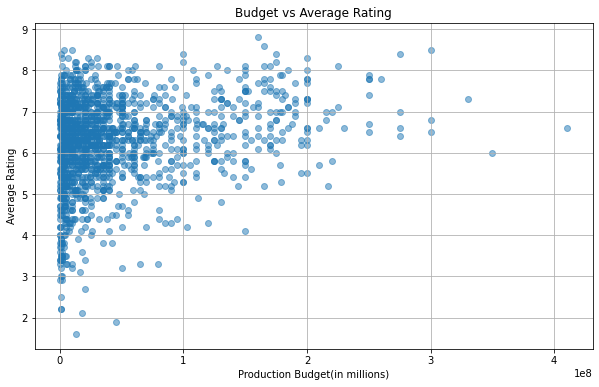

In [19]:
#create a scatter plot comparing the budget and rating
plt.figure(figsize=(10,6))
#define parameter values to be used
plt.scatter(optimized_df['production_budget'], optimized_df['averagerating'], alpha=0.5)
#name the scatterplot
plt.title('Budget vs Average Rating')
#label x-axis
plt.xlabel('Production Budget(in millions)')
#label y-axis
plt.ylabel('Average Rating')
plt.grid(True)
#show the scatterplot to be created
plt.show

With the scatter plot above generated, we are able to tell that generally higher budget movies tend to have a higher rating but we notice still some low budget movies attain the same. I decided against filtering the outliers as this would give a somewhat false perspective on the correlation between budget and ratings.
We can therefore say that higher budget movies tend to have a higher rating as compared to lower budgets which have a higher chance of having low ratings

### Average Rating vs Genre Analysis

Using the same concept now with a bar plot, we look at the relationship between the Genres of these movies and ratings from the viewers.This would essentially show us case example what viewers prefer in terms of type of movie to watch and does it have an impact on the rating they submit.

But we notice that a movie could appear more than once in a particular genre so we find the average rating for genre

In [20]:
optimized_df

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1541,45,"Jan 27, 2017",Emily,27000,3547,3547,2017,tt4393036,Emily,83.0,Drama,6.8,13.0
1455,1542,49,"Sep 1, 2015",Exeter,25000,0,489792,2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1456,1544,52,"Dec 1, 2015",Dutch Kills,25000,0,0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1457,1545,59,"Nov 25, 2011",The Ridges,17300,0,0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


In [21]:
optimized_df['genres'] = optimized_df['genres'].str.split(',')
optimized_df_2 = optimized_df.explode('genres')


optimized_df_2

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,Action,6.6,447624.0
0,0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,Adventure,6.6,447624.0
0,0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,Fantasy,6.6,447624.0
1,1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,tt6565702,Dark Phoenix,113.0,Action,6.0,24451.0
1,1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,tt6565702,Dark Phoenix,113.0,Adventure,6.0,24451.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1544,52,"Dec 1, 2015",Dutch Kills,25000,0,0,2015,tt2759066,Dutch Kills,90.0,Thriller,5.1,82.0
1457,1545,59,"Nov 25, 2011",The Ridges,17300,0,0,2011,tt1781935,The Ridges,89.0,Drama,2.9,127.0
1457,1545,59,"Nov 25, 2011",The Ridges,17300,0,0,2011,tt1781935,The Ridges,89.0,Horror,2.9,127.0
1457,1545,59,"Nov 25, 2011",The Ridges,17300,0,0,2011,tt1781935,The Ridges,89.0,Thriller,2.9,127.0


In [23]:

optimized_df_2 = optimized_df_2.groupby('genres')['averagerating'].mean().reset_index()
optimized_df_2

,genres,averagerating
0,Action,6.250450
1,Adventure,6.440230
2,Animation,6.519802
3,Biography,7.029323
4,Comedy,6.191716
5,Crime,6.321739
6,Documentary,6.696774
7,Drama,6.532584
8,Family,6.138462
9,Fantasy,6.102479


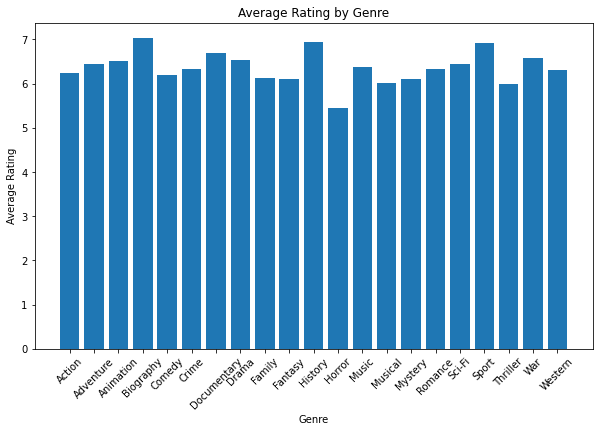

In [24]:
#create a barplot now having gotten the average rating
plt.figure(figsize=(10, 6))
plt.bar(optimized_df_2['genres'], optimized_df_2['averagerating'])
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

From the Barchart above History, Sports, Biography are the standout genres with good ratings as compared to horrors which have a low average rating aand this barchart gives a good insight into the trend with the genres involved


### Production Budget vs Worldwide Gross


To look at the amount of revenue generated and popularity in the global market, I compared the production budget for these movies and how it fared.
This would be a good insight into the trends and how quality in production would affect it reason being finances are a very crucial aspect of a program.
To do this we create a scatter plot to see the relationship between these.

<function matplotlib.pyplot.show(close=None, block=None)>

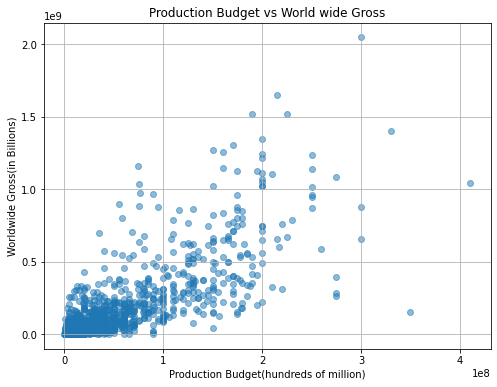

In [24]:

plt.figure(figsize=(8,6))
#define parameter values to be used
plt.scatter(optimized_df['production_budget'], optimized_df['worldwide_gross'], alpha=0.5)
#name the scatterplot
plt.title('Production Budget vs World wide Gross')
#label x-axis
plt.xlabel('Production Budget(hundreds of million)')
#label y-axis
plt.ylabel('Worldwide Gross(in Billions)')
plt.grid(True)
#show the scatterplot to be created
plt.show

As per the scatter plot created from our columns production budget and worldwide gross, we get to identify the cost efficiency of some of the movies created, observed trends with high risks and vice versa. Also we noted quite significant cases in which low budget movies generated less revenue to the global market.
In general the trend moves upwards for worldwide gross as the production budget of the movie increases.
This would be a very good reference when handling financial side of the investment as it gives insight on how the data points behave when the production budget rises.


## Conclusion

With the datasets we were working with, this should give Microsoft good insight on where to invest, understand the high risks and hop on to trends
Some of the findings must be interpreted carefully. We also noticed a general upward trend in the revenue collected globally from movies with a higher production budget not entirely due to causation but also correlation between the two variables.
With the data analysis we have carried out above ,the following recommendations are to be considered before venturing into the industry:

* Quality in movie production(higher production budget) creates grounds for good profits from the global market.

* Higher budget movies tend to bring out good ratings hence good customer satisfaction as the margin of the budgets helps the team to concentrate on the detail during movie production

* Animation, Drama, History, Sports, Biography are the standout genres with good ratings as compared to horrors which have a low average rating and would recommend Microsoft to consider these while making an informed Decision!!

